<a href="https://colab.research.google.com/github/rafaelrodolfon/analytic/blob/main/MVP_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**


O trabalho dignifica o ser humano e é fundamental para a convivência na sociedade, sendo um dos pilares do desenvolvimento nacional. No entanto, ainda há parcelas da população que enfrentam dificuldades de acesso ao mercado de trabalho. Neste projeto, serão analisadas algumas variáveis que podem influenciar o desemprego ou a desocupação dessa população, com o objetivo de criar um modelo para estimar o desemprego. Utilizaremos dados extraídos da biblioteca do IPEA e informações sobre o PIB mensal obtidas no site do IBGE.
```



**Premissa**

---


Determinar a quantidade de desempregados com base em variáveis como gastos de energia e crescimento do PIB. Essas variáveis são consideradas indicadores econômicos que têm uma relação significativa com o emprego. A hipótese é que mudanças nos gastos de energia e no crescimento do PIB podem afetar diretamente a quantidade de empregos disponíveis em uma economia, seja de forma positiva, estimulando o emprego, ou negativa, levando a demissões.

 ** 1 - Importação das Bibliotecas e Instação do Ipeadatapy **

In [1]:
! pip install ipeadatapy

  Importação as bibliotecas a qual iremos utilizar neste projeto

In [2]:
import ipeadatapy as ipea
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np

Uploud do XLSX no qual consta as inforrmações do PIB mensal que foram extraidos do IBGE

In [3]:
from google.colab import files

uploaded = files.upload()


Saving PIB.xlsx to PIB.xlsx


Seleção dos Dados Para Elaboração do Dataset

In [4]:
#lista das Tabelas do IpeaData
#ipea.list_series()

In [5]:
 #	PIB - taxa de investimento - preços correntes - Valores Mensais

 pib = pd.read_excel('PIB.xlsx')

 # Consumo de Energia Valores em (R$)

 CEC = ipea.timeseries('ELETRO12_CEETCOM12') # Comércio

 CEI = ipea.timeseries('ELETRO12_CEETIND12') # Industria

 # População Desocupada Numero de Pessoas

 População_desocupada = ipea.timeseries('PMEN12_QDESPOC12')

 # Taxa de Desemprego Valor %

 t_desemprego = ipea.timeseries('PMEN12_PNEAPRO12')

 #indice de expectativa do consumido
 ipca = ipea.timeseries('PRECOS12_IPCA12')

 #indice de expectativa do consumido
 iec = ipea.timeseries('FCESP12_IICF12')

 #Índice de Confiança do Empresário Industrial
 icei = ipea.timeseries('CNI12_ICEIGER12')

 #indice de confiança do consumido
 t_icc = ipea.timeseries('FCESP12_IIC12')

#*** 2 - Tratamento de Dados***

As restrições ou condições impostas para selecionar os dados incluem o uso do período de 2002 a 2016. Esta seleção foi feita devido aos dados serem parte de uma série histórica que foi interrompida em algum momento. Portanto, esse intervalo de tempo foi escolhido para garantir a consistência e a integridade dos dados disponíveis para análise.

In [6]:
# Removendo caracteres não numéricos das colunas dos Dataframe
t_desemprego = t_desemprego.drop(columns=['RAW DATE', 'CODE','DAY'])

CEC = CEC.drop(columns=['RAW DATE', 'CODE','DAY'])

CEI = CEI.drop(columns=['RAW DATE', 'CODE','DAY'])

População_desocupada = População_desocupada.drop(columns=['RAW DATE', 'CODE','DAY'])

ipca = ipca.drop(columns=['RAW DATE', 'CODE','DAY'])

iec = iec.drop(columns=['RAW DATE', 'CODE','DAY'])

icei = icei.drop(columns=['RAW DATE', 'CODE','DAY'])

t_icc = t_icc.drop(columns=['RAW DATE', 'CODE','DAY'])

In [7]:
# Renomeando as Colunas de modo a facilitar a compreenssão

t_desemprego.rename(columns={'VALUE ((%))': 'DESEMPREGO'}, inplace=True)

CEC.rename(columns={'VALUE (R$)': 'Energia_Comercio'}, inplace=True)

CEI.rename(columns={'VALUE (R$)': 'Energia_Industria'}, inplace=True)

População_desocupada.rename(columns={'VALUE (Pessoa)': 'Pop_desocupada'}, inplace=True)

iec.rename(columns={'VALUE (-)': 'iec'}, inplace=True)

ipca.rename(columns={'VALUE (-)': 'IPCA'}, inplace=True)

t_icc.rename(columns={'VALUE (-)': 'ICC'}, inplace=True)

In [8]:
# Copilando o Dataframe

df = pd.merge(t_desemprego,pib, on=['YEAR','MONTH'], how = 'inner')

df = pd.merge(df,CEC, on=['YEAR','MONTH'], how = 'inner')

df = pd.merge(df,CEI, on=['YEAR','MONTH'], how = 'inner')

df = pd.merge(df,População_desocupada, on=['YEAR','MONTH'], how = 'inner')

df = pd.merge(df,iec, on=['YEAR','MONTH'], how = 'inner')

df = pd.merge(df,ipca, on=['YEAR','MONTH'], how = 'inner')

df = pd.merge(df,t_icc, on=['YEAR','MONTH'], how = 'inner')

# ***3 - Análise de Variaveis***

In [9]:
df_analise = df.drop(columns=['MONTH', 'YEAR','Data'])

In [10]:
df

,MONTH,YEAR,DESEMPREGO,Data,PIB,Energia_Comercio,Energia_Industria,Pop_desocupada,iec,IPCA,ICC
0,3,2002,5.0,2002.03,118444.7,175.867328,97.078356,2606.147,100.37,1839.61,91.30
1,4,2002,4.7,2002.04,120385.9,176.326887,98.066381,2527.806,110.41,1854.33,96.00
2,5,2002,4.6,2002.05,123552.5,183.148061,105.328523,2391.017,110.25,1858.22,96.15
3,6,2002,4.7,2002.06,123424.4,184.779603,105.173685,2335.000,96.27,1866.02,84.40
4,7,2002,4.8,2002.07,126856.6,185.927464,105.982287,2415.265,104.91,1888.23,93.81
...,...,...,...,...,...,...,...,...,...,...,...
163,10,2015,1.9,2015.10,518828.9,441.186804,396.323858,1958.308,110.57,4405.95,88.77
164,11,2015,1.8,2015.11,513819.8,444.705980,400.596740,1874.000,106.38,4450.45,85.55
165,12,2015,1.7,2015.12,521918.7,450.937646,408.766776,1733.000,106.65,4493.17,87.17
166,1,2016,1.5,2016.01,490284.0,451.609975,412.895769,1879.000,110.34,4550.23,89.04


NameError: name 'plt' is not defined

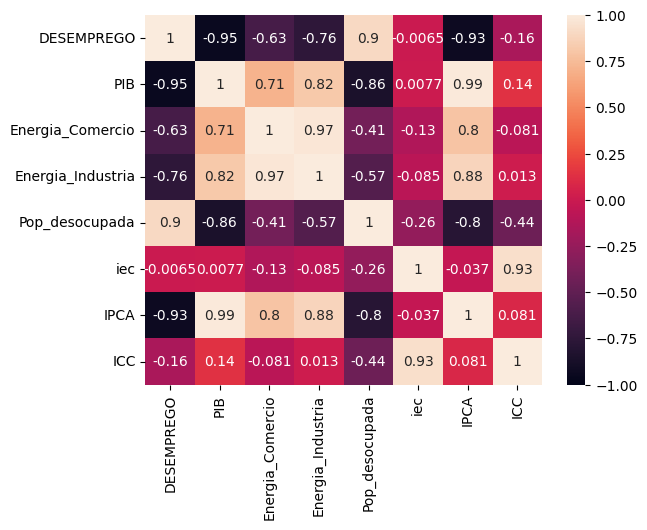

In [11]:
sns.heatmap(df_analise.corr(), annot=True, vmin=-1, vmax=1)
plt.show()


** 3.1 - Diante dos índices de correlação apresentados acima, foram selecionados os dados do PIB, consumo médio de energia do comércio, consumo médio de energia da indústria e IPCA como variáveis independentes que explicam a quantidade de população desocupada.**

# *** 4 - Aplicação dos Modelos**

4.1 - Importação dos Modelos

In [12]:
# Importação da separação de treino e teste
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Impotação dos Modelos Aplicados
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.ensemble import BaggingRegressor

# Importação de
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [13]:
x = df[['IPCA','Energia_Industria','Energia_Comercio','PIB',]]
y = df['Pop_desocupada']

[x_train, x_test, y_train, y_test] = train_test_split(x,y,test_size= 0.2 , random_state=91)

4.1.1 - Aplicação do Modelo de RandomForest

In [14]:
modelo = RandomForestRegressor(n_estimators=500,n_jobs=-1, random_state=0)
modelo.fit(x_train,y = y_train)
previsoes_RF = modelo.predict(x_test)

4.1.2 - Aplicação do Modelo Arvore de Regressão

In [19]:
modelo_arvore_regressao = DecisionTreeRegressor()
modelo_arvore_regressao.fit(x_train, y_train)
previsoes_tree = modelo_arvore_regressao.predict(x_test)

4.1.3 - Aplicação do Modelo de KNeighbors

In [18]:
modelo_knn_regressor = KNeighborsRegressor(n_neighbors=10)
modelo_knn_regressor.fit(x_train, y_train)
previsoes_knn = modelo_knn_regressor.predict(x_test)

4.1.4 - Aplicação do Modelo SVM

In [17]:
modelo_svm_regressao = svm.SVR(kernel='poly', degree=3)
modelo_svm_regressao.fit(x_train, y_train)
previsoes_svm = modelo_svm_regressao.predict(x_test)

4.1.4 - Aplicação do Modelo BaggingRegressor

In [20]:
bagging_reg = BaggingRegressor(n_estimators=100, random_state=42)
bagging_reg.fit(x_train, y_train)
previsoes_bagging = bagging_reg.predict(x_test)

5 - Análise dos Resultados dos Modelos

In [21]:
df_resultado = pd.DataFrame({'Resultado':y_test,'knn': previsoes_knn, 'svm': previsoes_svm, 'tree':previsoes_tree,'rf':previsoes_RF,'bagging':previsoes_bagging })

In [27]:
df_resultado = df_resultado.sort_index()
df_resultado

,Resultado,knn,svm,tree,rf,bagging
3,2335.000,2421.6472,2041.322306,2391.017,2395.528746,2394.79071
4,2415.265,2421.6472,2040.681613,2391.017,2386.503360,2382.80354
11,2437.828,2440.9658,2039.783637,2164.771,2361.986364,2391.44906
13,2647.885,2578.4522,2037.562455,2568.097,2614.526414,2614.16099
20,2665.410,2606.6598,2034.381660,2841.100,2748.055532,2758.70183
23,2575.915,2597.1005,2037.207578,2494.239,2631.215786,2632.84091
24,2783.139,2608.3601,2033.309602,2870.970,2713.145258,2693.58742
26,2678.689,2529.6091,2032.670705,2870.970,2618.114592,2624.00859
30,2418.477,2484.5795,2031.040734,2566.981,2433.030504,2457.16926
41,2076.384,2170.6820,2022.708335,2047.086,2073.113640,2064.17563


<Axes: >

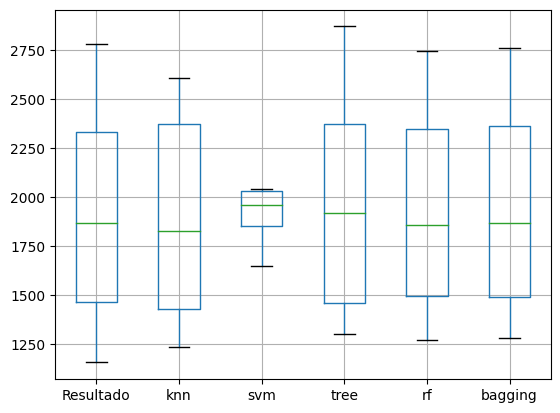

In [23]:
df_resultado.boxplot()

In [24]:
fig = px.scatter(df_resultado, y=df_resultado.columns, title='Dispersão entre Valores Reais e Previstos')
fig.show()


5.1 Cálculo do R²

In [30]:
r2_knn = r2_score(df_resultado['Resultado'], df_resultado['knn'])

r2_svm = r2_score(df_resultado['Resultado'], df_resultado['svm'])

r2_tree = r2_score(df_resultado['Resultado'], df_resultado['tree'])

r2_rf = r2_score(df_resultado['Resultado'], df_resultado['rf'])

r2_bagging = r2_score(df_resultado['Resultado'], df_resultado['bagging'])

r2 = pd.DataFrame({'knn': [r2_knn], 'svm': [r2_svm], 'tree': [r2_tree], 'rf': [r2_rf],'bagging':[r2_bagging]})
r2

,knn,svm,tree,rf,bagging
0,0.95573,0.38811,0.943725,0.968036,0.969197


5.2 Cálculo do MSE

In [31]:
mse_knn = mean_squared_error(df_resultado['Resultado'], df_resultado['knn'])

mse_svm = mean_squared_error(df_resultado['Resultado'], df_resultado['svm'])

mse_tree = mean_squared_error(df_resultado['Resultado'], df_resultado['tree'])

mse_rf = mean_squared_error(df_resultado['Resultado'], df_resultado['rf'])

mse_bagging = mean_squared_error(df_resultado['Resultado'], df_resultado['bagging'])

mse = pd.DataFrame({'knn': [mse_knn], 'svm': [mse_svm], 'tree': [mse_tree], 'rf': [mse_rf], 'bagging': [mse_bagging]})

mse

,knn,svm,tree,rf,bagging
0,9883.791937,136610.762186,12563.856471,7136.293896,6877.175519


5.3 Média

In [ ]:
df_resultado.mean()

Resultado    1919.671029
knn          1893.147956
svm          1909.434983
tree         1921.262441
rf           1915.081789
bagging      1918.193928
dtype: float64

###  6 - O modelo mais eficaz identificado foi o de Bagging, apresentando um

---

𝑅² próximo de 1 e um Erro médio quadrático MSE menor em comparação com os outros modelos. Isso sugere uma capacidade mais robusta de previsão, com uma distribuição de resultados mais próxima das observações reais. Notavelmente, ao considerar variáveis como consumo de energia no setor comercial e industrial, bem como o PIB e a inflação, podemos estimar os níveis de emprego na população. Com base nessas descobertas, há potencial para políticas governamentais empregarem esse modelo como uma ferramenta para projetar a geração de empregos na sociedade.

### 7 - Checklist

---



In [33]:
import ipywidgets as widgets

Item1 = 'Definição do Problema'
Item2 = 'Premissas ou hipóteses'
Item3 ='Restrições ou condições impostas para selecionar os dados'
Item4 = 'Refina a quantidade de atributos disponíveis, realizando o processo de feature selection'
Item5 = 'Selecionar os algoritmos mais indicados para o problema e dataset escolhidos'
Item6 = 'Ajuste inicial nos hiperparâmetros'
Item7 = 'Selecionar os algoritmos mais indicados para o problema e dataset escolhidos'
Item8 = 'Otimização dos hiperparâmetros de algum dos modelos'
Item9 = 'Selecionar as métricas de avaliação condizentes com o problema'
Item10 = 'Treinar o modelo escolhido com toda a base de treino, e teste-o com a base de teste'
Item11 ='Os resultados fazem sentido'
Item12 ='Comparar os resultados de diferentes modelos'
Item13 ='Descreva a melhor solução encontrada, justificando'

itens = [Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8, Item9, Item10, Item11, Item12, Item13]

checklist = [widgets.Checkbox(value=False, description=item) for item in itens]

def marcar_concluido(change):
    if change['new']:
        change['owner'].description = change['owner'].description.split(" ")[0] + " (concluído)"
    else:
        change['owner'].description = change['owner'].description.split(" ")[0]

for checkbox in checklist:
    checkbox.observe(marcar_concluido, names='value')
    display(checkbox)




Checkbox(value=False, description='Definição do Problema')

Checkbox(value=False, description='Premissas ou hipóteses')

Checkbox(value=False, description='Restrições ou condições impostas para selecionar os dados')

Checkbox(value=False, description='Refina a quantidade de atributos disponíveis, realizando o processo de feat…

Checkbox(value=False, description='Selecionar os algoritmos mais indicados para o problema e dataset escolhido…

Checkbox(value=False, description='Ajuste inicial nos hiperparâmetros')

Checkbox(value=False, description='Selecionar os algoritmos mais indicados para o problema e dataset escolhido…

Checkbox(value=False, description='Otimização dos hiperparâmetros de algum dos modelos')

Checkbox(value=False, description='Selecionar as métricas de avaliação condizentes com o problema')

Checkbox(value=False, description='Treinar o modelo escolhido com toda a base de treino, e teste-o com a base …

Checkbox(value=False, description='Os resultados fazem sentido')

Checkbox(value=False, description='Comparar os resultados de diferentes modelos')

Checkbox(value=False, description='Descreva a melhor solução encontrada, justificando')